===== Iris Dataset Head =====
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

===== Iris Dataset Tail =====
     sepal_length  sepal_width  petal_length  petal_width    species
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

===== Dataset Description =====
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000  

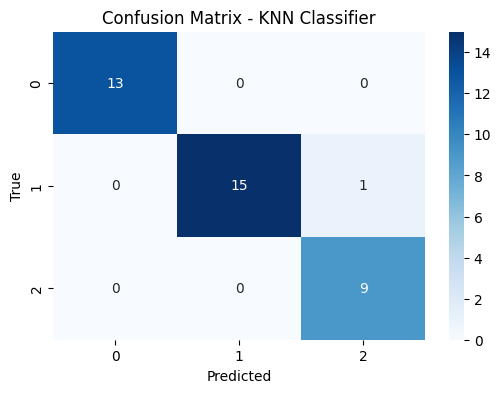


Classification Report (KNN):
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.94      0.97        16
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38


===== Naïve Bayes Classifier Results =====
Accuracy on Test Set: 1.00


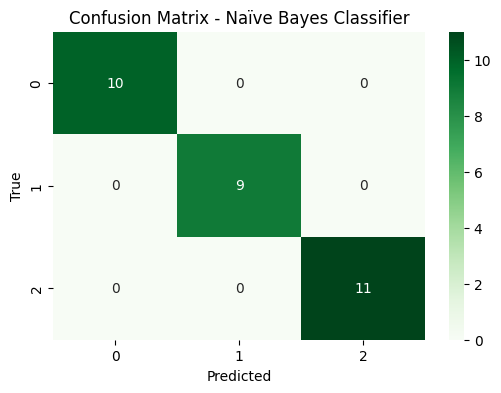


Classification Report (Naïve Bayes):
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

iris = pd.read_csv('iris.csv')
print("===== Iris Dataset Head =====")
print(iris.head())
print("\n===== Iris Dataset Tail =====")
print(iris.tail())
print("\n===== Dataset Description =====")
print(iris.describe())

feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = iris[feature_names]
Y = iris['species']

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

print("\n===== KNN Classifier Results =====")
print('Accuracy on Training Set: {:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy on Test Set: {:.2f}'.format(knn.score(X_test, y_test)))

y_pred_knn = knn.predict(X_test)
cm_knn = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(6,4))
sn.heatmap(cm_knn, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix - KNN Classifier")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

print("\nClassification Report (KNN):")
print(classification_report(y_test, y_pred_knn))


# Naïve Bayes Classifier

from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB


dataset = pd.read_csv('iris.csv')
X = dataset.iloc[:, :4].values
y = dataset['species'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

classifier = GaussianNB()
classifier.fit(X_train, y_train)

y_pred_nb = classifier.predict(X_test)
cm_nb = confusion_matrix(y_test, y_pred_nb)

print("\n===== Naïve Bayes Classifier Results =====")
print("Accuracy on Test Set: {:.2f}".format(accuracy_score(y_test, y_pred_nb)))

plt.figure(figsize=(6,4))
sn.heatmap(cm_nb, annot=True, cmap="Greens", fmt="d")
plt.title("Confusion Matrix - Naïve Bayes Classifier")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

print("\nClassification Report (Naïve Bayes):")
print(classification_report(y_test, y_pred_nb))
